In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
mnist = tf.keras.datasets.mnist

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

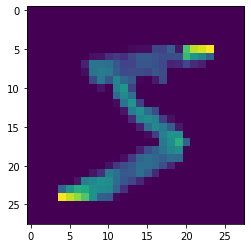

In [20]:
plt.imshow(x_train[0])

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [29]:
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.0420 - accuracy: 0.9861
Epoch 2/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.0326 - accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.0260 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0208 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.0175 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 2s 820us/step - loss: 0.0163 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0128 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.0131 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.0113 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 2s 887u

In [34]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 653us/step - loss: 0.1514 - accuracy: 0.9720


In [36]:
print(val_loss, ' ', val_acc)

0.15144623816013336   0.972000002861023


In [43]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.datasets import reuters 

# load and split data into training set and test set
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [44]:
print(f'training set : {train_data.shape}')
print(f'test set: {test_data.shape}')
print('training set example')
print(train_data[0])

training set : (8982,)
test set: (2246,)
training set example
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [45]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
                        [(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [46]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f'x_train sample : {x_train[0]}')
print(f'x_test sample : {x_test[0]}')

x_train sample : [0. 1. 1. ... 0. 0. 0.]
x_test sample : [0. 1. 1. ... 0. 0. 0.]


In [50]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

# built in keras function for one-hot encoding
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(f'one_hot_train_labels sample : {one_hot_train_labels[0]}')


one_hot_train_labels sample : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'models' is not defined

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))


In [53]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [55]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20


ValueError: in user code:

    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:291 call
        outputs = layer(inputs, **kwargs)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\fitzp\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_1 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 10000]
